In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.utils import to_categorical

# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
# Step 1: Load the dataset
file_path = 'gas_final.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

In [3]:
# Step 2: Data Exploration and Preprocessing
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274628 entries, 0 to 274627
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   address               274628 non-null  float64
 1   function              274628 non-null  float64
 2   length                274628 non-null  float64
 3   setpoint              64100 non-null   float64
 4   gain                  64100 non-null   float64
 5   reset rate            64100 non-null   float64
 6   deadband              64100 non-null   float64
 7   cycle time            64100 non-null   float64
 8   rate                  64100 non-null   float64
 9   system mode           64100 non-null   float64
 10  control scheme        64100 non-null   float64
 11  pump                  64100 non-null   float64
 12  solenoid              64100 non-null   float64
 13  pressure measurement  68888 non-null   float64
 14  crc rate              274628 non-null 

In [9]:
# Handle missing values for numeric columns using mean imputation
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [10]:
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [11]:
# Apply imputers
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])


In [12]:
# Encode categorical features if any
label_encoder = LabelEncoder()
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])


In [13]:
# Standardize numeric features
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [15]:
# Verify preprocessing
print("Preprocessed dataset info:")
print(data.info())
print(data.head())

Preprocessed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274628 entries, 0 to 274627
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   address               274628 non-null  float64
 1   function              274628 non-null  float64
 2   length                274628 non-null  float64
 3   setpoint              274628 non-null  float64
 4   gain                  274628 non-null  float64
 5   reset rate            274628 non-null  float64
 6   deadband              274628 non-null  float64
 7   cycle time            274628 non-null  float64
 8   rate                  274628 non-null  float64
 9   system mode           274628 non-null  float64
 10  control scheme        274628 non-null  float64
 11  pump                  274628 non-null  float64
 12  solenoid              274628 non-null  float64
 13  pressure measurement  274628 non-null  float64
 14  crc rate              274

In [17]:
# Proceed with separating features and target labels
X = data.drop(columns=["binary result", "categorized result", "specific result"])
y_binary = data["binary result"]
y_categorized = data["categorized result"]
y_specific = data["specific result"]

In [18]:
# Check shapes
print(f"Feature dataset shape: {X.shape}")
print(f"Binary target shape: {y_binary.shape}")
print(f"Categorized target shape: {y_categorized.shape}")
print(f"Specific target shape: {y_specific.shape}")

Feature dataset shape: (274628, 17)
Binary target shape: (274628,)
Categorized target shape: (274628,)
Specific target shape: (274628,)


In [19]:
# Balancing the dataset using All-KNN
#Edited
enn = EditedNearestNeighbours()
X_balanced, y_binary_balanced = enn.fit_resample(X, y_binary)
_, y_categorized_balanced = enn.fit_resample(X, y_categorized)
_, y_specific_balanced = enn.fit_resample(X, y_specific)


In [21]:
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split

# Balancing the dataset for each target independently
enn = EditedNearestNeighbours()

# Balance for binary labels
X_binary_balanced, y_binary_balanced = enn.fit_resample(X, y_binary)

# Balance for categorized labels
X_categorized_balanced, y_categorized_balanced = enn.fit_resample(X, y_categorized)

# Balance for specific labels
X_specific_balanced, y_specific_balanced = enn.fit_resample(X, y_specific)

In [22]:
# Ensure consistency in sample sizes
if len(X_binary_balanced) != len(y_binary_balanced):
    raise ValueError("Inconsistent samples in binary label dataset.")
if len(X_categorized_balanced) != len(y_categorized_balanced):
    raise ValueError("Inconsistent samples in categorized label dataset.")
if len(X_specific_balanced) != len(y_specific_balanced):
    raise ValueError("Inconsistent samples in specific label dataset.")

# Splitting data into training and testing sets for each target
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(
    X_binary_balanced, y_binary_balanced, test_size=0.3, random_state=42, stratify=y_binary_balanced
)

X_categorized_train, X_categorized_test, y_categorized_train, y_categorized_test = train_test_split(
    X_categorized_balanced, y_categorized_balanced, test_size=0.3, random_state=42, stratify=y_categorized_balanced
)

X_specific_train, X_specific_test, y_specific_train, y_specific_test = train_test_split(
    X_specific_balanced, y_specific_balanced, test_size=0.3, random_state=42, stratify=y_specific_balanced
)

In [23]:
# Check the shapes of the resulting datasets
print("Binary Dataset Shapes:")
print(f"Train: {X_binary_train.shape}, {y_binary_train.shape}")
print(f"Test: {X_binary_test.shape}, {y_binary_test.shape}")

print("Categorized Dataset Shapes:")
print(f"Train: {X_categorized_train.shape}, {y_categorized_train.shape}")
print(f"Test: {X_categorized_test.shape}, {y_categorized_test.shape}")

print("Specific Dataset Shapes:")
print(f"Train: {X_specific_train.shape}, {y_specific_train.shape}")
print(f"Test: {X_specific_test.shape}, {y_specific_test.shape}")

Binary Dataset Shapes:
Train: (184279, 17), (184279,)
Test: (78978, 17), (78978,)
Categorized Dataset Shapes:
Train: (172171, 17), (172171,)
Test: (73788, 17), (73788,)
Specific Dataset Shapes:
Train: (170116, 17), (170116,)
Test: (72907, 17), (72907,)


In [24]:
# Initialize classical models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "NaiveBayes": GaussianNB(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}


In [28]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.utils import to_categorical

In [32]:
# Function to train and evaluate classical models
def train_and_evaluate_classical(models, X_train, X_test, y_train, y_test, label_name):
    results = {}
    for model_name, model in models.items():
        print(f"Training {model_name} on {label_name} Labels...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Handle AUC-ROC for multi-class
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)
            if len(np.unique(y_test)) > 2:  # Multi-class case
                auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
            else:  # Binary case
                auc_roc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            auc_roc = None
        
        # Store results
        results[model_name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average='weighted'),
            "Recall": recall_score(y_test, y_pred, average='weighted'),
            "F1 Score": f1_score(y_test, y_pred, average='weighted'),
            "AUC-ROC": auc_roc
        }
        
        print(f"{model_name} - {label_name} Results:")
        print(classification_report(y_test, y_pred))
    
    return results

In [30]:
# Train and evaluate classical models for binary labels
binary_results = train_and_evaluate_classical(
    models, X_binary_train, X_binary_test, y_binary_train, y_binary_test, "Binary"
)

Training KNN on Binary Labels...
KNN - Binary Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     60963
           1       0.95      0.85      0.89     18015

    accuracy                           0.95     78978
   macro avg       0.95      0.92      0.93     78978
weighted avg       0.95      0.95      0.95     78978

Training RandomForest on Binary Labels...
RandomForest - Binary Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     60963
           1       0.95      0.86      0.90     18015

    accuracy                           0.96     78978
   macro avg       0.96      0.93      0.94     78978
weighted avg       0.96      0.96      0.96     78978

Training NaiveBayes on Binary Labels...
NaiveBayes - Binary Results:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     60963
           1       1.00      0.21      0

In [33]:
# Train and evaluate classical models for categorized labels
categorized_results = train_and_evaluate_classical(
    models, X_categorized_train, X_categorized_test, y_categorized_train, y_categorized_test, "Categorized"
)

Training KNN on Categorized Labels...
KNN - Categorized Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     60963
           1       0.76      0.57      0.65       470
           2       0.85      0.67      0.75      1554
           3       0.97      0.98      0.98      2128
           4       0.99      0.98      0.99      5443
           5       0.99      1.00      1.00      1470
           6       0.99      0.88      0.93       653
           7       1.00      0.98      0.99      1107

    accuracy                           0.98     73788
   macro avg       0.94      0.88      0.91     73788
weighted avg       0.98      0.98      0.98     73788

Training RandomForest on Categorized Labels...
RandomForest - Categorized Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     60963
           1       0.70      0.54      0.61       470
           2       0.81      0.60     

/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalid

In [34]:
# Train and evaluate classical models for specific labels
specific_results = train_and_evaluate_classical(
    models, X_specific_train, X_specific_test, y_specific_train, y_specific_test, "Specific"
)

Training KNN on Specific Labels...
KNN - Specific Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     60963
           1       0.98      0.98      0.98       491
           2       1.00      0.84      0.91       293
           3       1.00      0.99      0.99       509
           4       0.99      0.99      0.99       581
           5       0.96      0.95      0.95       425
           6       0.96      0.96      0.96       443
           7       0.95      0.93      0.94       383
           8       0.98      1.00      0.99       462
           9       0.99      0.99      0.99       393
          10       0.99      0.94      0.97       545
          11       0.98      1.00      0.99       489
          12       0.99      0.93      0.96       304
          13       1.00      0.90      0.95       200
          14       0.98      1.00      0.99       515
          15       1.00      1.00      1.00       462
          16       1.0

/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalid

NaiveBayes - Specific Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     60963
           1       0.10      0.47      0.16       491
           2       0.00      0.00      0.00       293
           3       0.42      0.55      0.47       509
           4       0.16      0.54      0.25       581
           5       0.03      0.13      0.04       425
           6       0.02      0.11      0.04       443
           7       0.04      0.07      0.05       383
           8       0.53      0.50      0.51       462
           9       0.10      0.59      0.17       393
          10       1.00      0.47      0.64       545
          11       0.49      0.04      0.08       489
          12       0.00      0.00      0.00       304
          13       1.00      0.90      0.95       200
          14       0.36      0.35      0.36       515
          15       0.41      0.22      0.29       462
          16       0.02      1.00      0.03       

/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/savalid

In [35]:
# Function to build and train deep learning models
def build_and_train_dl_model(model_type, input_shape, num_classes, X_train, y_train, X_test, y_test, label_name):
    print(f"Training {model_type} on {label_name} Labels...")
    if model_type == "LSTM":
        model = Sequential([
            LSTM(50, input_shape=input_shape, return_sequences=True),
            LSTM(50),
            Dense(num_classes, activation='softmax')
        ])
    elif model_type == "GRU":
        model = Sequential([
            GRU(50, input_shape=input_shape, return_sequences=True),
            GRU(50),
            Dense(num_classes, activation='softmax')
        ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    
    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{model_type} - {label_name} Test Accuracy: {test_accuracy:.4f}")
    
    return test_accuracy

In [40]:
# Train and evaluate LSTM for Binary labels
lstm_binary_accuracy = build_and_train_dl_model(
    "LSTM", (X_binary_train.shape[1], 1), len(np.unique(y_binary_train)),
    X_binary_train, y_binary_train, X_binary_test, y_binary_test, "Binary"
)

Training LSTM on Binary Labels...
Epoch 1/10
5759/5759 [==============================] - 29s 5ms/step - loss: 0.4013 - accuracy: 0.8221
Epoch 2/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3598 - accuracy: 0.8377
Epoch 3/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3504 - accuracy: 0.8414
Epoch 4/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3467 - accuracy: 0.8427
Epoch 5/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3420 - accuracy: 0.8444
Epoch 6/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3394 - accuracy: 0.8450
Epoch 7/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3354 - accuracy: 0.8461
Epoch 8/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3318 - accuracy: 0.8467
Epoch 9/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3299 - accuracy: 0.8476
Epoch 10/10
5759/5759 [================

In [36]:
# Train and evaluate LSTM for categorized labels
lstm_categorized_accuracy = build_and_train_dl_model(
    "LSTM", (X_categorized_train.shape[1], 1), len(np.unique(y_categorized_train)),
    X_categorized_train, y_categorized_train, X_categorized_test, y_categorized_test, "Categorized"
)

Training LSTM on Categorized Labels...
Epoch 1/10
5381/5381 [==============================] - 26s 5ms/step - loss: 0.4652 - accuracy: 0.8778
Epoch 2/10
5381/5381 [==============================] - 25s 5ms/step - loss: 0.3650 - accuracy: 0.8945
Epoch 3/10
5381/5381 [==============================] - 25s 5ms/step - loss: 0.3508 - accuracy: 0.8985
Epoch 4/10
5381/5381 [==============================] - 25s 5ms/step - loss: 0.3440 - accuracy: 0.9006
Epoch 5/10
5381/5381 [==============================] - 26s 5ms/step - loss: 0.3389 - accuracy: 0.9015
Epoch 6/10
5381/5381 [==============================] - 25s 5ms/step - loss: 0.3345 - accuracy: 0.9026
Epoch 7/10
5381/5381 [==============================] - 25s 5ms/step - loss: 0.3323 - accuracy: 0.9029
Epoch 8/10
5381/5381 [==============================] - 26s 5ms/step - loss: 0.3276 - accuracy: 0.9035
Epoch 9/10
5381/5381 [==============================] - 25s 5ms/step - loss: 0.3198 - accuracy: 0.9049
Epoch 10/10
5381/5381 [===========

In [41]:
# Train and evaluate LSTM for Specific labels
lstm_specific_accuracy = build_and_train_dl_model(
    "LSTM", (X_specific_train.shape[1], 1), len(np.unique(y_specific_train)),
    X_specific_train, y_specific_train, X_specific_test, y_specific_test, "Specific"
)

Training LSTM on Specific Labels...
Epoch 1/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.7490 - accuracy: 0.8587
Epoch 2/10
5317/5317 [==============================] - 24s 5ms/step - loss: 0.5716 - accuracy: 0.8774
Epoch 3/10
5317/5317 [==============================] - 24s 5ms/step - loss: 0.5454 - accuracy: 0.8810
Epoch 4/10
5317/5317 [==============================] - 24s 5ms/step - loss: 0.5331 - accuracy: 0.8841
Epoch 5/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5245 - accuracy: 0.8859
Epoch 6/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5182 - accuracy: 0.8871
Epoch 7/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5113 - accuracy: 0.8880
Epoch 8/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5045 - accuracy: 0.8900
Epoch 9/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5032 - accuracy: 0.8900
Epoch 10/10
5317/5317 [==============

In [43]:
# Train and evaluate GRU for Binary labels
gru_binary_accuracy = build_and_train_dl_model(
    "GRU", (X_binary_train.shape[1], 1), len(np.unique(y_binary_train)),
    X_binary_train, y_binary_train, X_binary_test, y_binary_test, "Binary"
)

Training GRU on Binary Labels...
Epoch 1/10
5759/5759 [==============================] - 28s 5ms/step - loss: 0.3908 - accuracy: 0.8303
Epoch 2/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3546 - accuracy: 0.8422
Epoch 3/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3492 - accuracy: 0.8434
Epoch 4/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3434 - accuracy: 0.8449
Epoch 5/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3364 - accuracy: 0.8461
Epoch 6/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3242 - accuracy: 0.8492
Epoch 7/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3171 - accuracy: 0.8513
Epoch 8/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3122 - accuracy: 0.8529
Epoch 9/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3093 - accuracy: 0.8536
Epoch 10/10
5759/5759 [=================

In [37]:
# Train and evaluate GRU for categorized labels
gru_categorized_accuracy = build_and_train_dl_model(
    "GRU", (X_categorized_train.shape[1], 1), len(np.unique(y_categorized_train)),
    X_categorized_train, y_categorized_train, X_categorized_test, y_categorized_test, "Categorized"
)

Training GRU on Categorized Labels...
Epoch 1/10
5381/5381 [==============================] - 26s 5ms/step - loss: 0.4321 - accuracy: 0.8841
Epoch 2/10
5381/5381 [==============================] - 25s 5ms/step - loss: 0.3509 - accuracy: 0.8993
Epoch 3/10
5381/5381 [==============================] - 25s 5ms/step - loss: 0.3363 - accuracy: 0.9023
Epoch 4/10
5381/5381 [==============================] - 24s 5ms/step - loss: 0.3283 - accuracy: 0.9033
Epoch 5/10
5381/5381 [==============================] - 24s 4ms/step - loss: 0.3187 - accuracy: 0.9050
Epoch 6/10
5381/5381 [==============================] - 24s 4ms/step - loss: 0.3110 - accuracy: 0.9066
Epoch 7/10
5381/5381 [==============================] - 24s 4ms/step - loss: 0.3034 - accuracy: 0.9086
Epoch 8/10
5381/5381 [==============================] - 24s 5ms/step - loss: 0.2982 - accuracy: 0.9100
Epoch 9/10
5381/5381 [==============================] - 24s 5ms/step - loss: 0.2944 - accuracy: 0.9110
Epoch 10/10
5381/5381 [============

In [44]:
# Train and evaluate GRU for Specific labels
gru_specific_accuracy = build_and_train_dl_model(
    "GRU", (X_specific_train.shape[1], 1), len(np.unique(y_specific_train)),
    X_specific_train, y_specific_train, X_specific_test, y_specific_test, "Specific"
)

Training GRU on Specific Labels...
Epoch 1/10
5317/5317 [==============================] - 26s 5ms/step - loss: 0.6818 - accuracy: 0.8670
Epoch 2/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5428 - accuracy: 0.8829
Epoch 3/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5204 - accuracy: 0.8871
Epoch 4/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5104 - accuracy: 0.8901
Epoch 5/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.4951 - accuracy: 0.8937
Epoch 6/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.4870 - accuracy: 0.8951
Epoch 7/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.4792 - accuracy: 0.8970
Epoch 8/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.4690 - accuracy: 0.8993
Epoch 9/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.4620 - accuracy: 0.9009
Epoch 10/10
5317/5317 [===============

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
import numpy as np

# Function to train, predict, and calculate metrics for deep learning models
def train_and_evaluate_dl_models(models, targets, input_shapes, num_classes, label_names):
    dl_metrics = {}
    for model_type in models:
        for (X_train, X_test, y_train, y_test), input_shape, num_class, label_name in zip(targets, input_shapes, num_classes, label_names):
            print(f"Training and evaluating {model_type} on {label_name} Labels...")
            
            # Define the model
            if model_type == "LSTM":
                model = Sequential([
                    LSTM(50, input_shape=input_shape, return_sequences=True),
                    LSTM(50),
                    Dense(num_class, activation='softmax')
                ])
            elif model_type == "GRU":
                model = Sequential([
                    GRU(50, input_shape=input_shape, return_sequences=True),
                    GRU(50),
                    Dense(num_class, activation='softmax')
                ])
            
            # Compile the model
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            
            # Convert DataFrames to NumPy arrays and reshape
            X_train_np = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test_np = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)
            
            # Train the model
            model.fit(X_train_np, y_train, epochs=10, batch_size=32, verbose=1)
            
            # Predict
            y_pred = model.predict(X_test_np).argmax(axis=1)
            y_proba = model.predict(X_test_np)
            
            # Calculate metrics
            if len(np.unique(y_test)) > 2:  # Multi-class case
                auc_roc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
            else:  # Binary case
                auc_roc = roc_auc_score(y_test, y_proba[:, 1])
            
            dl_metrics[f"{model_type}_{label_name}"] = {
                "Precision": precision_score(y_test, y_pred, average='weighted'),
                "Recall": recall_score(y_test, y_pred, average='weighted'),
                "F1 Score": f1_score(y_test, y_pred, average='weighted'),
                "AUC-ROC": auc_roc
            }
            
            print(f"{model_type} - {label_name} Metrics:")
            print(dl_metrics[f"{model_type}_{label_name}"])
    
    return dl_metrics

# Define input shapes, targets, and label names
input_shapes = [
    (X_binary_train.shape[1], 1),
    (X_categorized_train.shape[1], 1),
    (X_specific_train.shape[1], 1)
]

num_classes = [
    len(np.unique(y_binary_train)),
    len(np.unique(y_categorized_train)),
    len(np.unique(y_specific_train))
]

targets = [
    (X_binary_train, X_binary_test, y_binary_train, y_binary_test),
    (X_categorized_train, X_categorized_test, y_categorized_train, y_categorized_test),
    (X_specific_train, X_specific_test, y_specific_train, y_specific_test)
]

label_names = ["Binary", "Categorized", "Specific"]

# Models to train
dl_models = ["LSTM", "GRU"]

# Train and evaluate LSTM and GRU models
dl_metrics = train_and_evaluate_dl_models(dl_models, targets, input_shapes, num_classes, label_names)

# Display metrics
for key, metrics in dl_metrics.items():
    print(f"Metrics for {key}: {metrics}")


Training and evaluating LSTM on Binary Labels...
Epoch 1/10
5759/5759 [==============================] - 28s 5ms/step - loss: 0.4044 - accuracy: 0.8215
Epoch 2/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3692 - accuracy: 0.8329
Epoch 3/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3531 - accuracy: 0.8395
Epoch 4/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3470 - accuracy: 0.8423
Epoch 5/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3416 - accuracy: 0.8439
Epoch 6/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3385 - accuracy: 0.8456
Epoch 7/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3335 - accuracy: 0.8469
Epoch 8/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3308 - accuracy: 0.8478
Epoch 9/10
5759/5759 [==============================] - 27s 5ms/step - loss: 0.3264 - accuracy: 0.8489
Epoch 10/10
2469/2469 [=

/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5317/5317 [==============================] - 27s 5ms/step - loss: 0.7633 - accuracy: 0.8586
Epoch 2/10
5317/5317 [==============================] - 26s 5ms/step - loss: 0.5677 - accuracy: 0.8777
Epoch 3/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5386 - accuracy: 0.8826
Epoch 4/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5264 - accuracy: 0.8850
Epoch 5/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5219 - accuracy: 0.8858
Epoch 6/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.5145 - accuracy: 0.8870
Epoch 7/10
5317/5317 [==============================] - 26s 5ms/step - loss: 0.5094 - accuracy: 0.8883
Epoch 8/10
5317/5317 [==============================] - 25s 5ms/step - loss: 0.4991 - accuracy: 0.8900
Epoch 9/10
5317/5317 [==============================] - 26s 5ms/step - loss: 0.4940 - accuracy: 0.8912
Epoch 10/10
2279/2279 [==============================] - 3s 1ms/step
LSTM - Specific

/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5759/5759 [==============================] - 28s 5ms/step - loss: 0.3889 - accuracy: 0.8300
Epoch 2/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3525 - accuracy: 0.8425
Epoch 3/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3415 - accuracy: 0.8450
Epoch 4/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3305 - accuracy: 0.8480
Epoch 5/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3249 - accuracy: 0.8495
Epoch 6/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3206 - accuracy: 0.8511
Epoch 7/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3165 - accuracy: 0.8523
Epoch 8/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3136 - accuracy: 0.8526
Epoch 9/10
5759/5759 [==============================] - 26s 5ms/step - loss: 0.3105 - accuracy: 0.8537
Epoch 10/10
2469/2469 [==============================] - 3s 1ms/step
GRU - Binary Me

/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5317/5317 [==============================] - 27s 5ms/step - loss: 0.6827 - accuracy: 0.8672
Epoch 2/10
5317/5317 [==============================] - 27s 5ms/step - loss: 0.5402 - accuracy: 0.8842
Epoch 3/10
5317/5317 [==============================] - 26s 5ms/step - loss: 0.5205 - accuracy: 0.8878
Epoch 4/10
5317/5317 [==============================] - 27s 5ms/step - loss: 0.5105 - accuracy: 0.8900
Epoch 5/10
5317/5317 [==============================] - 27s 5ms/step - loss: 0.4996 - accuracy: 0.8932
Epoch 6/10
5317/5317 [==============================] - 27s 5ms/step - loss: 0.4905 - accuracy: 0.8944
Epoch 7/10
5317/5317 [==============================] - 27s 5ms/step - loss: 0.4786 - accuracy: 0.8974
Epoch 8/10
5317/5317 [==============================] - 28s 5ms/step - loss: 0.4711 - accuracy: 0.8991
Epoch 9/10
5317/5317 [==============================] - 26s 5ms/step - loss: 0.4640 - accuracy: 0.9008
Epoch 10/10
2279/2279 [==============================] - 3s 1ms/step
GRU - Specific 

/Users/savalideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualization 

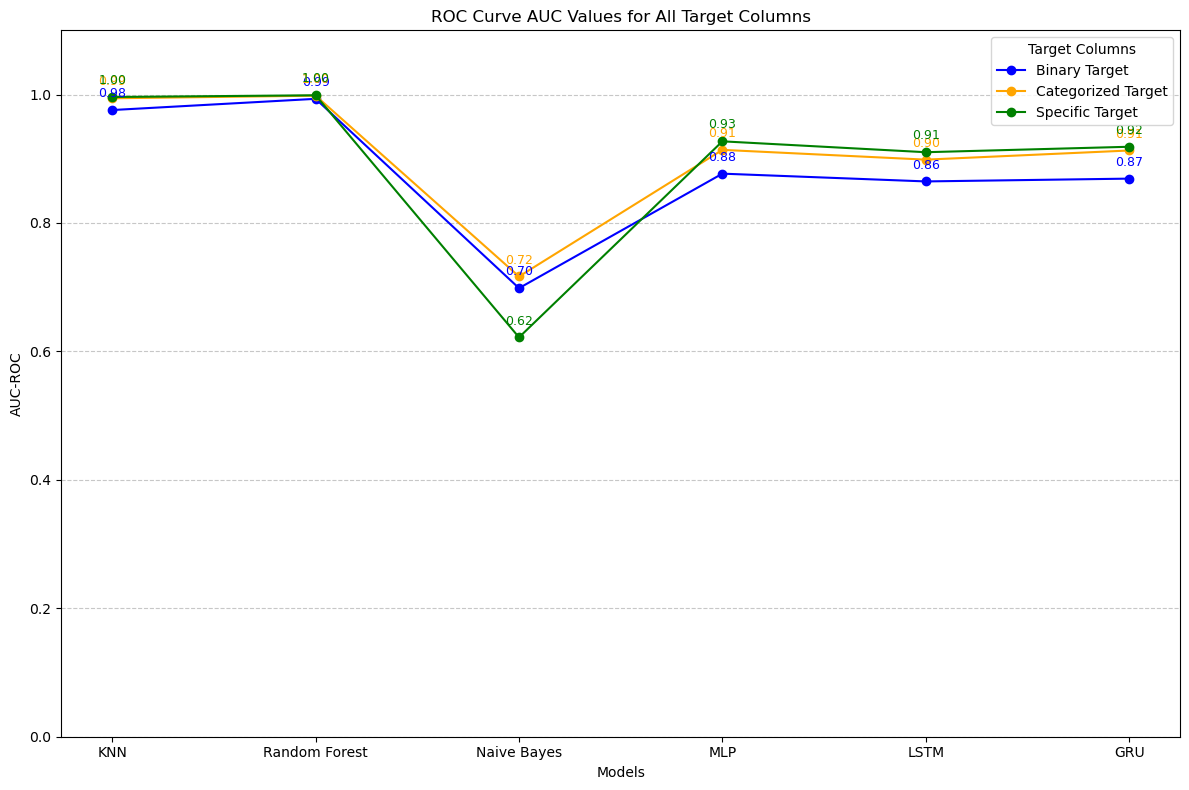

In [78]:
import matplotlib.pyplot as plt

# Prepare data for plotting
models = list(binary_roc.keys())
binary_values = list(binary_roc.values())
categorized_values = list(categorized_roc.values())
specific_values = list(specific_roc.values())

# Plot ROC curves for all target columns
plt.figure(figsize=(12, 8))
plt.plot(models, binary_values, marker="o", linestyle="-", label="Binary Target", color="blue")
plt.plot(models, categorized_values, marker="o", linestyle="-", label="Categorized Target", color="orange")
plt.plot(models, specific_values, marker="o", linestyle="-", label="Specific Target", color="green")

# Add details to the plot
plt.title("ROC Curve AUC Values for All Target Columns")
plt.ylabel("AUC-ROC")
plt.xlabel("Models")
plt.ylim(0, 1.1)  # Set y-axis limit to show full range of AUC values
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate points with AUC values
for i, value in enumerate(binary_values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center", fontsize=9, color="blue")
for i, value in enumerate(categorized_values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center", fontsize=9, color="orange")
for i, value in enumerate(specific_values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha="center", fontsize=9, color="green")

plt.legend(title="Target Columns")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

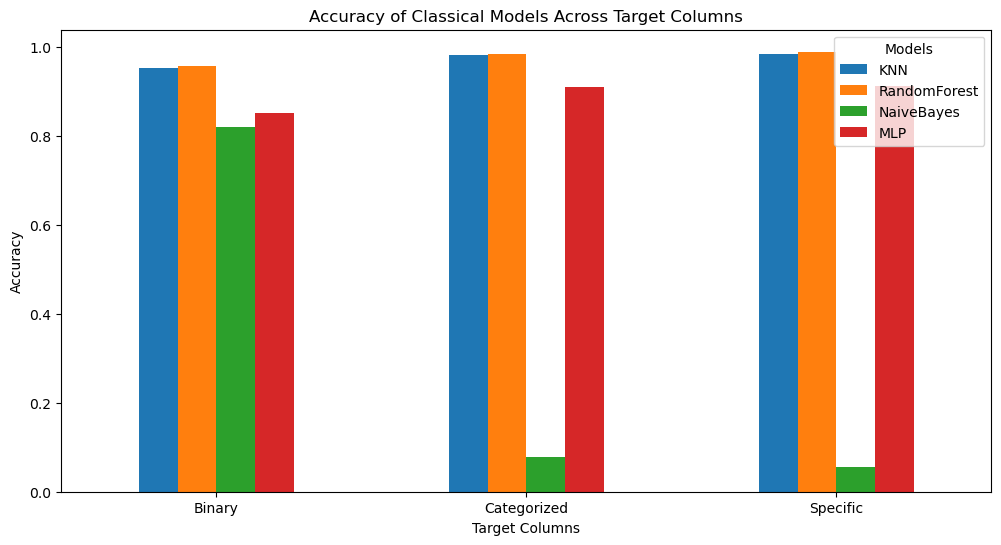

<Figure size 1200x600 with 0 Axes>

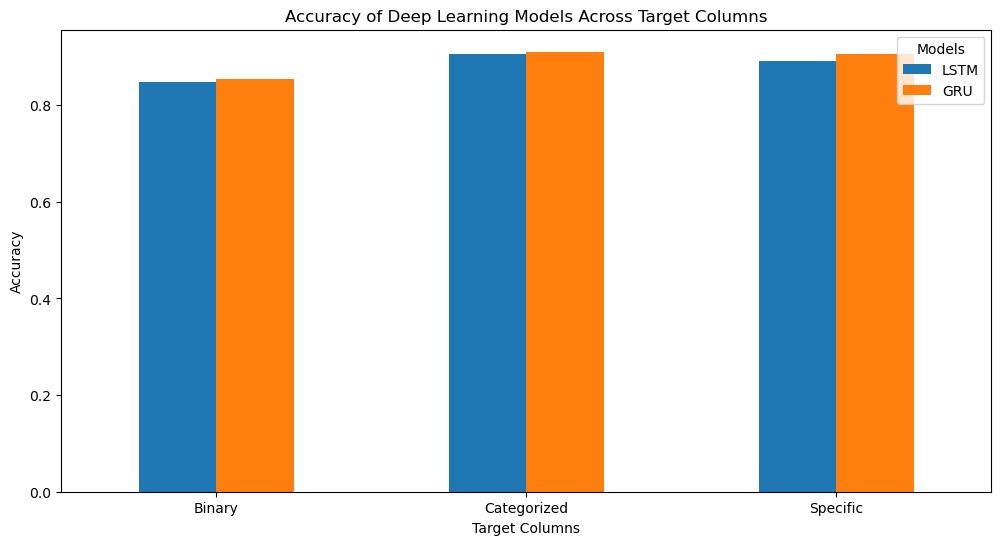

<Figure size 1200x600 with 0 Axes>

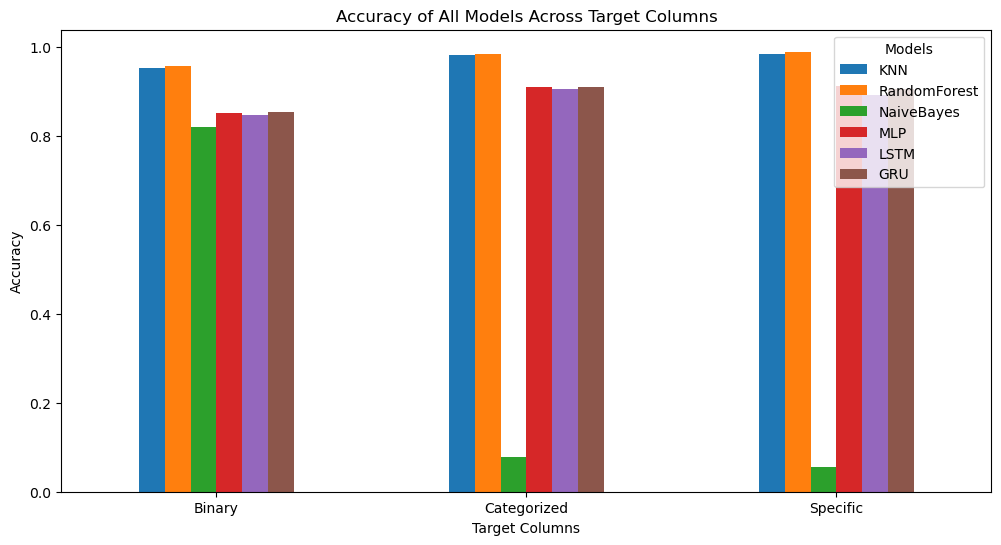

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization
# Extract accuracies from the provided variables
classical_accuracies = {
    "KNN": [binary_results["KNN"]["Accuracy"], categorized_results["KNN"]["Accuracy"], specific_results["KNN"]["Accuracy"]],
    "RandomForest": [binary_results["RandomForest"]["Accuracy"], categorized_results["RandomForest"]["Accuracy"], specific_results["RandomForest"]["Accuracy"]],
    "NaiveBayes": [binary_results["NaiveBayes"]["Accuracy"], categorized_results["NaiveBayes"]["Accuracy"], specific_results["NaiveBayes"]["Accuracy"]],
    "MLP": [binary_results["MLP"]["Accuracy"], categorized_results["MLP"]["Accuracy"], specific_results["MLP"]["Accuracy"]]
}

deep_learning_accuracies = {
    "LSTM": [lstm_binary_accuracy, lstm_categorized_accuracy, lstm_specific_accuracy],
    "GRU": [gru_binary_accuracy, gru_categorized_accuracy, gru_specific_accuracy]
}

# Target column names
targets = ["Binary", "Categorized", "Specific"]

# Create a DataFrame for easier plotting
classical_df = pd.DataFrame(classical_accuracies, index=targets)
deep_learning_df = pd.DataFrame(deep_learning_accuracies, index=targets)

# Plot 1: Classical Models
plt.figure(figsize=(12, 6))
classical_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Accuracy of Classical Models Across Target Columns")
plt.xlabel("Target Columns")
plt.ylabel("Accuracy")
plt.legend(title="Models")
plt.show()

# Plot 2: Deep Learning Models
plt.figure(figsize=(12, 6))
deep_learning_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Accuracy of Deep Learning Models Across Target Columns")
plt.xlabel("Target Columns")
plt.ylabel("Accuracy")
plt.legend(title="Models")
plt.show()

# Plot 3: Combined Comparison
combined_df = pd.concat([classical_df, deep_learning_df], axis=1)
plt.figure(figsize=(12, 6))
combined_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Accuracy of All Models Across Target Columns")
plt.xlabel("Target Columns")
plt.ylabel("Accuracy")
plt.legend(title="Models")
plt.show()


<Figure size 1200x600 with 0 Axes>

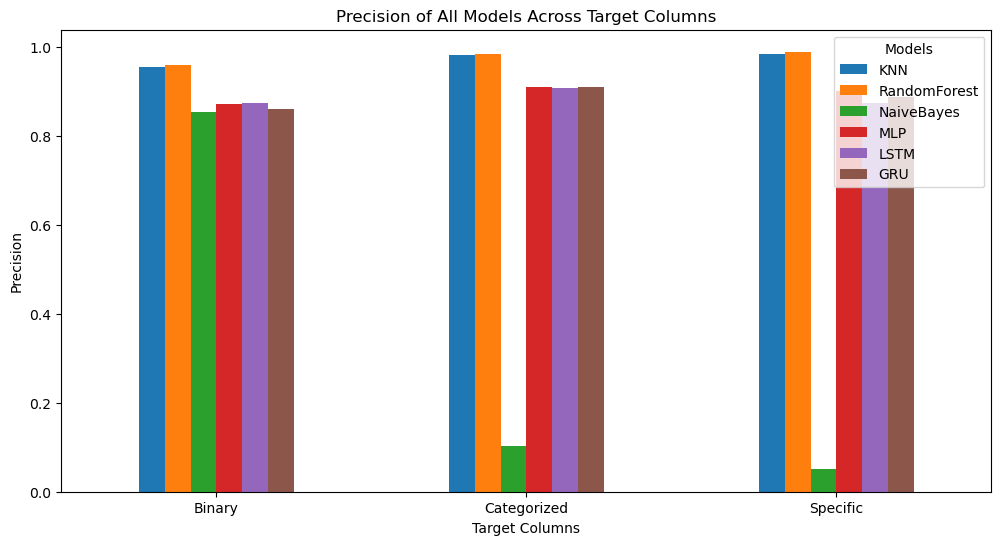

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization
# Extract accuracies from the provided variables
classical_accuracies = {
    "KNN": [binary_results["KNN"]["Precision"], categorized_results["KNN"]["Precision"], specific_results["KNN"]["Precision"]],
    "RandomForest": [binary_results["RandomForest"]["Precision"], categorized_results["RandomForest"]["Precision"], specific_results["RandomForest"]["Precision"]],
    "NaiveBayes": [binary_results["NaiveBayes"]["Precision"], categorized_results["NaiveBayes"]["Precision"], specific_results["NaiveBayes"]["Precision"]],
    "MLP": [binary_results["MLP"]["Precision"], categorized_results["MLP"]["Precision"], specific_results["MLP"]["Precision"]]
}

deep_learning_accuracies = {
    "LSTM": [dl_metrics["LSTM_Binary"]["Precision"], dl_metrics["LSTM_Categorized"]["Precision"], dl_metrics["LSTM_Specific"]["Precision"]],
    "GRU": [dl_metrics["GRU_Binary"]["Precision"], dl_metrics["GRU_Categorized"]["Precision"], dl_metrics["GRU_Specific"]["Precision"]],
}

# Target column names
targets = ["Binary", "Categorized", "Specific"]

# Create a DataFrame for easier plotting
classical_df = pd.DataFrame(classical_accuracies, index=targets)
deep_learning_df = pd.DataFrame(deep_learning_accuracies, index=targets)


# Plot 3: Combined Comparison
combined_df = pd.concat([classical_df, deep_learning_df], axis=1)
plt.figure(figsize=(12, 6))
combined_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Precision of All Models Across Target Columns")
plt.xlabel("Target Columns")
plt.ylabel("Precision")
plt.legend(title="Models")
plt.show()


<Figure size 1200x600 with 0 Axes>

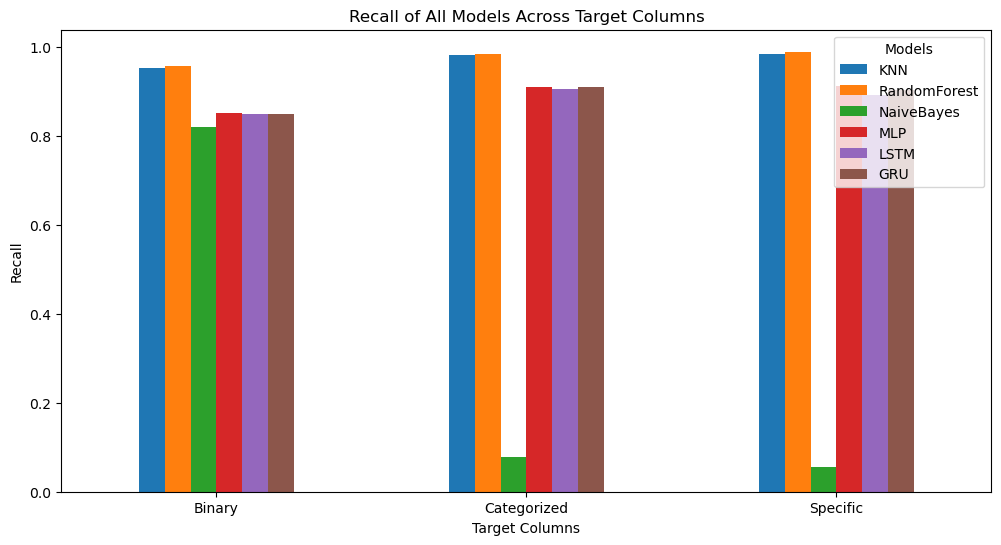

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization
# Extract accuracies from the provided variables
classical_accuracies = {
    "KNN": [binary_results["KNN"]["Recall"], categorized_results["KNN"]["Recall"], specific_results["KNN"]["Recall"]],
    "RandomForest": [binary_results["RandomForest"]["Recall"], categorized_results["RandomForest"]["Recall"], specific_results["RandomForest"]["Recall"]],
    "NaiveBayes": [binary_results["NaiveBayes"]["Recall"], categorized_results["NaiveBayes"]["Recall"], specific_results["NaiveBayes"]["Recall"]],
    "MLP": [binary_results["MLP"]["Recall"], categorized_results["MLP"]["Recall"], specific_results["MLP"]["Recall"]]
}

deep_learning_accuracies = {
    "LSTM": [dl_metrics["LSTM_Binary"]["Recall"], dl_metrics["LSTM_Categorized"]["Recall"], dl_metrics["LSTM_Specific"]["Recall"]],
    "GRU": [dl_metrics["GRU_Binary"]["Recall"], dl_metrics["GRU_Categorized"]["Recall"], dl_metrics["GRU_Specific"]["Recall"]],
}

# Target column names
targets = ["Binary", "Categorized", "Specific"]

# Create a DataFrame for easier plotting
classical_df = pd.DataFrame(classical_accuracies, index=targets)
deep_learning_df = pd.DataFrame(deep_learning_accuracies, index=targets)


# Plot 3: Combined Comparison
combined_df = pd.concat([classical_df, deep_learning_df], axis=1)
plt.figure(figsize=(12, 6))
combined_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Recall of All Models Across Target Columns")
plt.xlabel("Target Columns")
plt.ylabel("Recall")
plt.legend(title="Models")
plt.show()


<Figure size 1200x600 with 0 Axes>

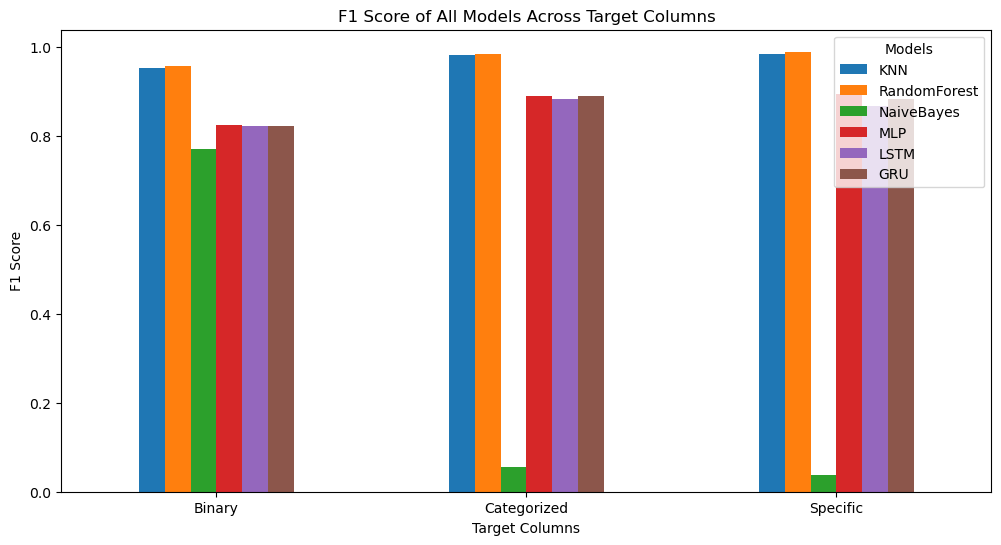

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization
# Extract accuracies from the provided variables
classical_accuracies = {
    "KNN": [binary_results["KNN"]["F1 Score"], categorized_results["KNN"]["F1 Score"], specific_results["KNN"]["F1 Score"]],
    "RandomForest": [binary_results["RandomForest"]["F1 Score"], categorized_results["RandomForest"]["F1 Score"], specific_results["RandomForest"]["F1 Score"]],
    "NaiveBayes": [binary_results["NaiveBayes"]["F1 Score"], categorized_results["NaiveBayes"]["F1 Score"], specific_results["NaiveBayes"]["F1 Score"]],
    "MLP": [binary_results["MLP"]["F1 Score"], categorized_results["MLP"]["F1 Score"], specific_results["MLP"]["F1 Score"]]
}

deep_learning_accuracies = {
    "LSTM": [dl_metrics["LSTM_Binary"]["F1 Score"], dl_metrics["LSTM_Categorized"]["F1 Score"], dl_metrics["LSTM_Specific"]["F1 Score"]],
    "GRU": [dl_metrics["GRU_Binary"]["F1 Score"], dl_metrics["GRU_Categorized"]["F1 Score"], dl_metrics["GRU_Specific"]["F1 Score"]],
}

# Target column names
targets = ["Binary", "Categorized", "Specific"]

# Create a DataFrame for easier plotting
classical_df = pd.DataFrame(classical_accuracies, index=targets)
deep_learning_df = pd.DataFrame(deep_learning_accuracies, index=targets)


# Plot 3: Combined Comparison
combined_df = pd.concat([classical_df, deep_learning_df], axis=1)
plt.figure(figsize=(12, 6))
combined_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("F1 Score of All Models Across Target Columns")
plt.xlabel("Target Columns")
plt.ylabel("F1 Score")
plt.legend(title="Models")
plt.show()
